# Check Telluric Mask

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.io import fits
import pandas as pd

import seaborn as sns
from tqdm import tqdm

import sys
sys.path.append('../')
from utils import *
from planetInjection import default_tapas_file,default_tell_file

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

## Read in Data

In [2]:
# Read in TAPAS Telluric Model
hdus = fits.open('/mnt/home/lzhao/ceph/TelluricModels/kpno_telluric_16.0_51.0.fits')
wapas, tapas = hdus[1].data['wavelength'].copy(), hdus[1].data['transmittance'].copy()
wapas = wapas[::-1]*10
tapas = tapas[::-1]
hdus.close()

# Read in Default Tellluric Mask
hdus = fits.open(default_tell_file)
tell_wave = hdus['wavelength'].data.copy()
tell_mask = hdus['telluric_mask'].data.copy().astype(bool)
seln_mask = hdus['selenite_mask'].data.copy().astype(bool)
tpas_mask = hdus['tapas_mask'].data.copy().astype(bool)
hdus.close()

## Plot Model and Mask

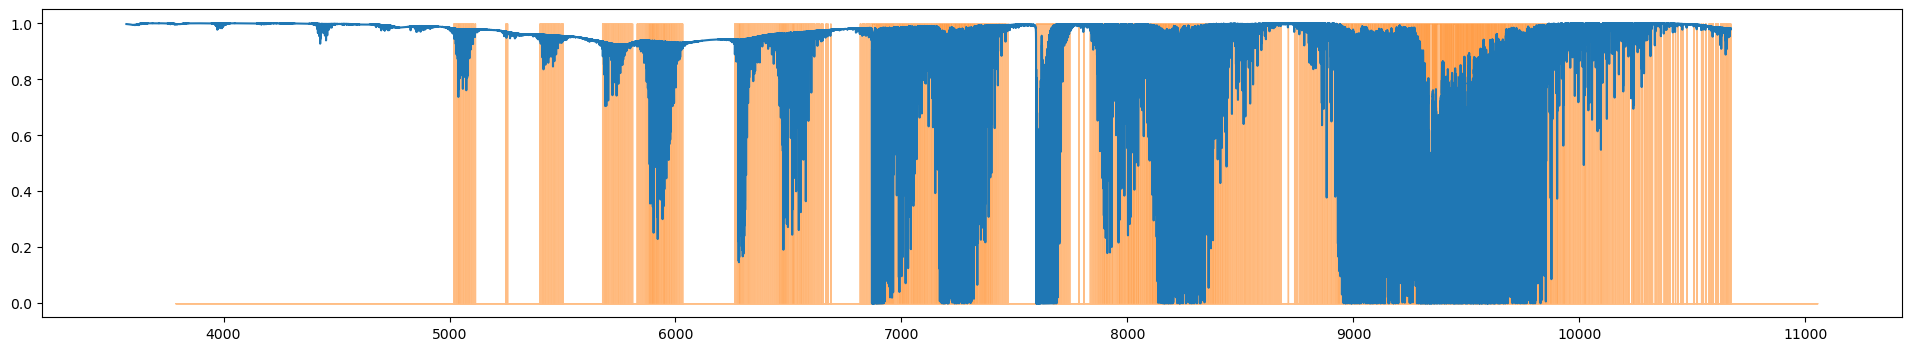

In [3]:
plt.figure(figsize=(24,4))
plt.plot(wapas,tapas)
plt.fill_between(tell_wave,np.zeros_like(tell_wave),tell_mask,alpha=0.5,color='C1')

## Zoom Ins

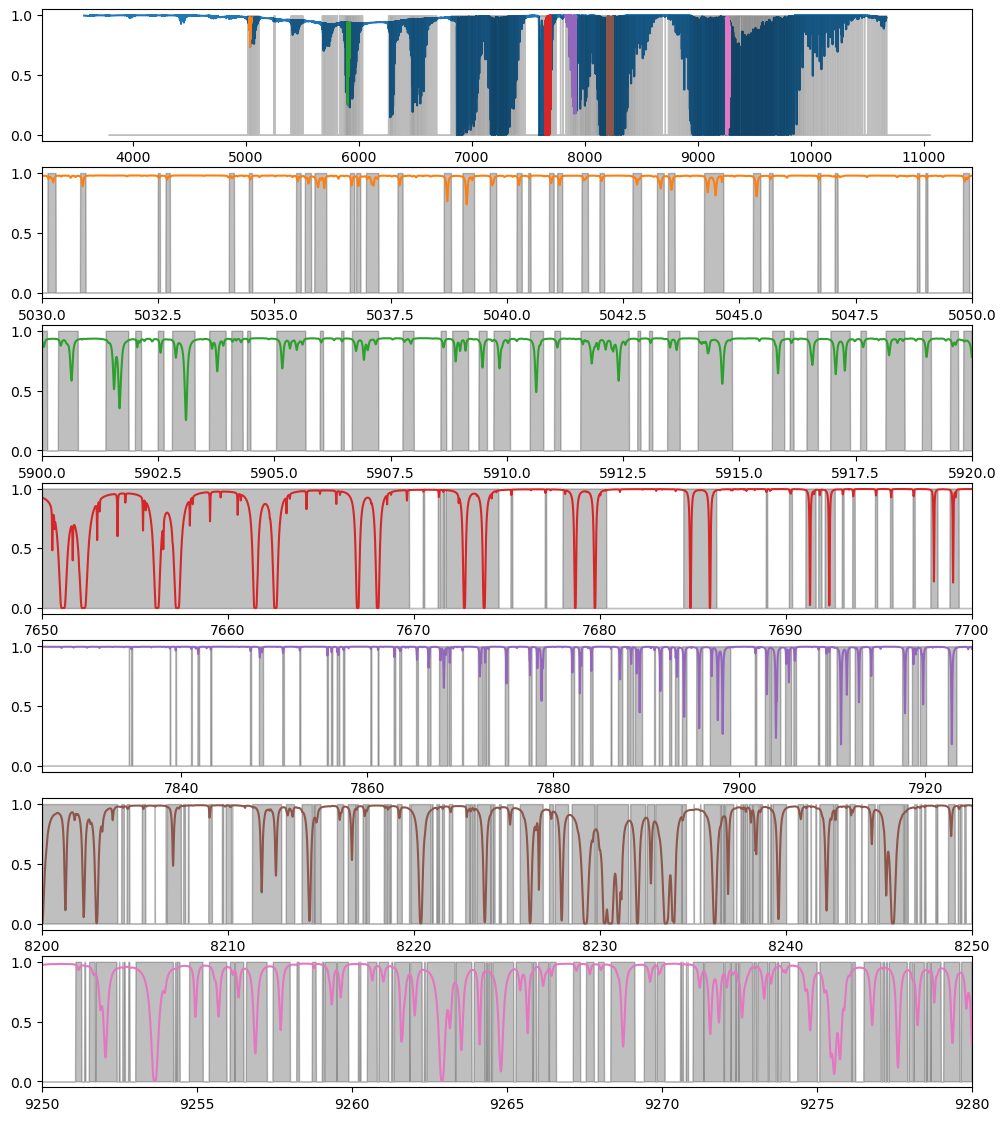

In [5]:
zooms = [(5030,5050),(5900,5920),(7650,7700),(7825,7925),(8200,8250),(9250,9280)]
fig, axes = plt.subplots(len(zooms)+1,1,figsize=(12,(len(zooms)+1)*2))
ax0 = axes[0]
ax0.plot(wapas,tapas,'C0',zorder=0)
ax0.fill_between(tell_wave,np.zeros_like(tell_wave),tell_mask,alpha=0.25,color='k',zorder=1)
for i,zoom in enumerate(zooms):
    ax = axes[i+1]
    xmin, xmax = zoom
    mapas = (wapas>xmin)&(wapas<xmax)
    m = (tell_wave>xmin)&(tell_wave<xmax)
    ax0.plot(wapas[mapas],tapas[mapas],f'C{i+1}')
    ax.plot(wapas[mapas],tapas[mapas],f'C{i+1}')
    ax.fill_between(tell_wave[m],np.zeros(np.sum(m)),tell_mask[m],alpha=0.25,color='k')
    ax.set_xlim(xmin,xmax)